<a href="https://colab.research.google.com/github/Sharini-19/Clinical_DataAnalysis/blob/main/Diabetes_Readmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

# Load the dataset
file_path = '/content/diabetic_data.csv'
data = pd.read_csv(file_path)

# Display the unique values in the 'readmitted' column
print(data['readmitted'].unique())



['NO' '>30' '<30']


In [12]:
print(data.shape)

(101766, 50)


**Data Preprocessing**

In [13]:
# Convert 'readmitted' into a binary target variable
data['Target'] = (data['readmitted'] == '<30').astype(int)
data.drop('readmitted', axis=1, inplace=True)

# Handle missing values and '?' placeholders
# Example: Replace '?' with NaN and then fill or drop
data.replace('?', pd.NA, inplace=True)
data.fillna(method='ffill', inplace=True)  # Forward fill for simplicity; consider other methods as appropriate

# Convert categorical variables using get_dummies
data = pd.get_dummies(data)



**Split the Data**

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop('Target', axis=1)  # Ensure 'Target' is your outcome variable
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Model Building**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8878152636750737
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     27105
           1       0.00      0.00      0.00      3425

    accuracy                           0.89     30530
   macro avg       0.44      0.50      0.47     30530
weighted avg       0.79      0.89      0.84     30530



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



**Advanced Model Evaluation**

**To better understand the model's performance, consider plotting an ROC curve and calculating the AUC score**    

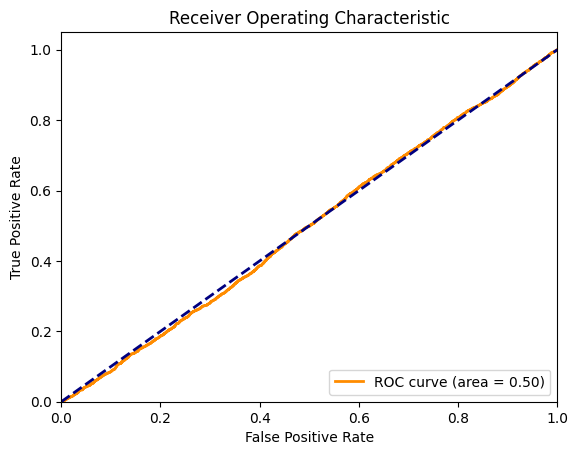

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**The above prediction model is specifically designed to address a common challenge in healthcare: predicting whether diabetic patients will be readmitted to a hospital within 30 days after their discharge. This predictive task is crucial because it has implications for patient care, hospital administration, and overall healthcare resource management.**

**The above prediction model is specifically designed to address a common challenge in healthcare:
predicting whether diabetic patients will be readmitted to a hospital within 30 days after their discharge.
This predictive task is crucial because it has implications for patient care, hospital administration, and overall healthcare resource management.**

**Objectives of the Prediction Model**
1. **Predict Hospital Readmissions**: The primary goal is to determine if a diabetic patient will be readmitted within 30 days of their initial discharge.
This is a critical metric for hospitals as it often reflects on the quality of care delivered and helps identify areas for improvement in patient management.
2. **Improve Patient Outcomes**: By accurately predicting potential readmissions, healthcare providers can implement preemptive interventions to improve patient outcomes, adjust treatment plans, and provide additional support where necessary.
3. **Resource Management**: Understanding readmission risks helps hospitals better manage resources by anticipating demands on services and allocating resources more efficiently, which is especially important in high-demand areas like diabetes care.

**How the Model Works**
- **Data Preprocessing**: The model first processes a dataset by handling missing values, encoding categorical variables, and defining a binary target variable. The 'readmitted' column is transformed to reflect '1' if a patient was readmitted within 30 days and '0' otherwise.
- **Model Training and Testing**: A logistic regression model is used as a baseline approach. This method is chosen for its efficiency and effectiveness in binary classification tasks. The dataset is split into training and testing sets to evaluate the model's performance on unseen data.
- **Evaluation**: The model's accuracy and its ability to classify patients correctly are assessed using metrics like accuracy score and ROC-AUC. These metrics help evaluate how well the model distinguishes between patients who will be readmitted and those who will not.

**Importance in Healthcare**
Predictive modeling in healthcare, particularly using data-driven approaches like this one, plays a vital role in enhancing patient care strategies, reducing unnecessary hospital readmissions, and optimizing healthcare delivery.
This model not only helps in proactive patient management but also in reducing the financial strain on patients and healthcare systems due to repeated admissions.

By leveraging historical data and patient records, the model attempts to capture underlying patterns and risk factors associated with readmissions, which can then be used to inform clinical decisions and policy-making.
The insights gained from such models are invaluable for continuous improvement in healthcare services, especially for chronic conditions like diabetes that require long-term management and care.